In [1]:
%pip install pyautogen seaborn


[notice] A new release of pip is available: 23.3.1 -> 24.1.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from IPython.display import Image

import autogen

config_list_gpt4 = autogen.config_list_from_json(
    "OAI_CONFIG_LIST.json",
)

/home/andy/works/openai/autogen_sample/.venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
llm_config = {"config_list": config_list_gpt4, "stream": True}
user_proxy = autogen.UserProxyAgent(
    name="User_proxy",
    system_message="A human admin.",
    code_execution_config={
        "last_n_messages": 3,
        "work_dir": "groupchat",
        "use_docker": False,
    },  # Please set use_docker=True if docker is available to run the generated code. Using docker is safer than running the generated code directly.
    human_input_mode="NEVER",
)
coder = autogen.AssistantAgent(
    name="Coder",  # the default assistant agent is capable of solving problems with code
    llm_config=llm_config,
    system_message="You are Python expert assistant doing well with generating code and modifying errors.",
)



critic = autogen.AssistantAgent(
    name="Critic",
     system_message=
     """
        Critic. 귀하는 명확한 근거를 제시하면서 1(나쁨)~10(좋음)의 점수를 제공하여 주어진 시각화 코드의 품질을 평가하는 데 고도로 숙련된 도우미입니다. 각 평가에 대해 시각화 모범 사례를 고려해야 합니다. 구체적으로 다음 차원에서 코드를 신중하게 평가할 수 있습니다.
        - 버그(버그): 버그, 논리 오류, 구문 오류 또는 오타가 있나요? 코드가 컴파일되지 않는 이유가 있나요? 어떻게 수정해야 하나요? 버그가 있는 경우 버그 점수는 반드시 5점 미만이어야 합니다.
        - 데이터 변환(변환): 데이터가 시각화 유형에 맞게 적절하게 변환되었나요? 예를 들어, 데이터 집합이 필요한 경우 적절하게 필터링, 집계 또는 그룹화되었는가? 날짜 필드를 사용하는 경우, 날짜 필드가 먼저 날짜 개체 등으로 변환되었는가?
        - 목표 준수(규정 준수): 코드가 지정된 비주얼리제이션 목표를 얼마나 잘 충족합니까?
        - 시각화 유형(유형): 모범 사례를 고려할 때 시각화 유형이 데이터 및 의도에 적합한가? 인사이트를 전달하는 데 더 효과적인 시각화 유형이 있는가? 다른 시각화 유형이 더 적절하다면 점수는 반드시 5점 미만이어야 합니다.
        - 데이터 인코딩(인코딩): 데이터가 시각화 유형에 맞게 적절하게 인코딩되어 있습니까?
        - 미학(심미성): 비주얼리제이션의 미학이 비주얼리제이션 유형 및 데이터에 적합한가?
        위의 각 차원에 대한 점수를 제공해야 합니다.
        {버그: 0, 변환: 0, 목표준수: 0, 유형: 0, 인코딩: 0, 미학: 0}
        코드를 제안하지 마세요.
        마지막으로, 위의 비판을 바탕으로 코더가 코드를 개선하기 위해 취해야 할 구체적인 조치 목록을 제안하세요.
    """,
    llm_config=llm_config,
)

groupchat = autogen.GroupChat(agents=[user_proxy, coder, critic], messages=[], max_round=20)
manager = autogen.GroupChatManager(groupchat=groupchat, llm_config=llm_config)

In [4]:
user_proxy.initiate_chat(
    manager,
    message="https://raw.githubusercontent.com/uwdata/draco/master/data/cars.csv 에서 데이터를 다운로드하고 무게와 마력 사이의 관계를 알려주는 시각화를 플롯합니다. 플롯을 파일에 저장합니다. 시각화하기 전에 데이터 집합의 필드를 인쇄합니다.",
)
# type exit to terminate the chat

User_proxy (to chat_manager):

https://raw.githubusercontent.com/uwdata/draco/master/data/cars.csv 에서 데이터를 다운로드하고 무게와 마력 사이의 관계를 알려주는 시각화를 플롯합니다. 플롯을 파일에 저장합니다. 시각화하기 전에 데이터 집합의 필드를 인쇄합니다.

--------------------------------------------------------------------------------
Coder


Next speaker: Coder

먼저, 필요한 라이브러리를 설치하지 않았다면 설치하고, 이후 데이터 다운로드, 필드 출력, 그리고 시각화를 수행하는 Python 코드를 제공합니다.

### 필요한 라이브러리 설치
```bash
pip install pandas matplotlib requests
```

### Python 코드
```python
import pandas as pd
import matplotlib.pyplot as plt
import requests

# CSV 파일 다운로드
url = "https://raw.githubusercontent.com/uwdata/draco/master/data/cars.csv"
response = requests.get(url)
open('cars.csv', 'wb').write(response.content)

# 데이터프레임으로 읽기
df = pd.read_csv('cars.csv')

# 필드 인쇄
print("데이터 집합의 필드:")
print(df.columns)

# 시각화
plt.figure(figsize=(10, 6))
plt.scatter(df['Weight_in_lbs'], df['Horsepower'], alpha=0.5)
plt.title('Weight vs Horsepower')
plt.xlabel('Weight (lbs)')
plt.ylabel('Horsepower')
plt.grid(True

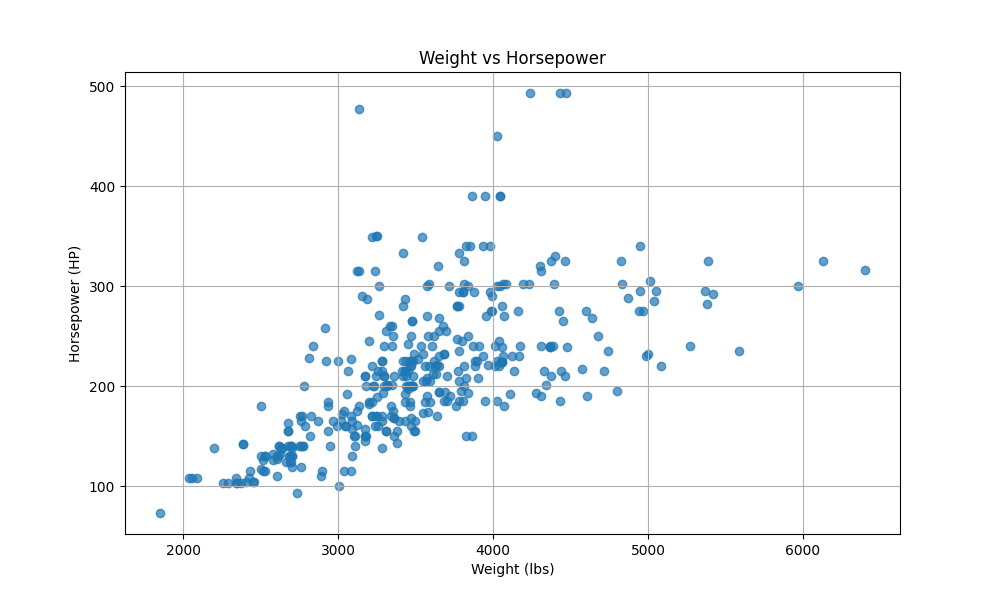

In [ ]:
Image(filename="groupchat/weight_vs_horsepower.png")

In [ ]:
user_proxy.reset()
coder.reset()
critic.reset()
groupchat = autogen.GroupChat(agents=[user_proxy, coder, critic], messages=[], max_round=20)
manager = autogen.GroupChatManager(groupchat=groupchat, llm_config=llm_config)
user_proxy.initiate_chat(
    manager,
    message="https://raw.githubusercontent.com/vega/vega/main/docs/data/seattle-weather.csv 에서 데이터를 다운로드하고 각 날씨의 양을 알려주는 플롯을 표시합니다. 플롯을 파일에 저장합니다. 시각화하기 전에 데이터 집합의 필드를 인쇄합니다. 비평가의 피드백을 받아 코드를 개선합니다.",
)

User_proxy (to chat_manager):

https://raw.githubusercontent.com/vega/vega/main/docs/data/seattle-weather.csv 에서 데이터를 다운로드하고 각 날씨의 양을 알려주는 플롯을 표시합니다. 플롯을 파일에 저장합니다. 시각화하기 전에 데이터 집합의 필드를 인쇄합니다. 비평가의 피드백을 받아 코드를 개선합니다.

--------------------------------------------------------------------------------



Next speaker: Coder

Coder (to chat_manager):

아래에는 주어진 URL에서 데이터를 다운로드하고, 데이터셋의 필드를 출력한 후 날씨의 양을 플롯하고, 그 플롯을 파일에 저장하는 Python 코드 예제가 있습니다. 또한 시각화와 관련된 개선 피드백도 고려할 수 있도록 작성하였습니다.

먼저 필요한 패키지를 설치 및 임포트합니다:

```bash
pip install pandas matplotlib requests
```

다음은 코드 예제입니다:

```python
import pandas as pd
import matplotlib.pyplot as plt
import requests
import io

# 데이터를 다운로드할 URL
url = "https://raw.githubusercontent.com/vega/vega/main/docs/data/seattle-weather.csv"

# 데이터 다운로드 및 읽기
response = requests.get(url)
if response.status_code == 200:
    data = response.content
    df = pd.read_csv(io.StringIO(data.decode('utf-8')))
else:
    print("데이터를 다운로드하는 데 실패했습니다.")
    exit()

# 데이터셋의 필드(열) 인쇄
print("데이터셋의 필드:")
print(df.columns)

# 각 날씨의 양을 계산
weather_counts = df['weather'].value_counts()

# 플롯 생성
plt.figure(figsize=(10, 6))
weather_counts.plot(kind='bar', color='skyblue')
plt.title('Frequency of Different Weather Types in Seattle')
plt.xlabel('Weather Type')
plt.ylabel('Frequency')

# 플롯을

ChatResult(chat_id=None, chat_history=[{'content': 'https://raw.githubusercontent.com/vega/vega/main/docs/data/seattle-weather.csv 에서 데이터를 다운로드하고 각 날씨의 양을 알려주는 플롯을 표시합니다. 플롯을 파일에 저장합니다. 시각화하기 전에 데이터 집합의 필드를 인쇄합니다. 비평가의 피드백을 받아 코드를 개선합니다.', 'role': 'assistant'}, {'content': '아래에는 주어진 URL에서 데이터를 다운로드하고, 데이터셋의 필드를 출력한 후 날씨의 양을 플롯하고, 그 플롯을 파일에 저장하는 Python 코드 예제가 있습니다. 또한 시각화와 관련된 개선 피드백도 고려할 수 있도록 작성하였습니다.\n\n먼저 필요한 패키지를 설치 및 임포트합니다:\n\n```bash\npip install pandas matplotlib requests\n```\n\n다음은 코드 예제입니다:\n\n```python\nimport pandas as pd\nimport matplotlib.pyplot as plt\nimport requests\nimport io\n\n# 데이터를 다운로드할 URL\nurl = "https://raw.githubusercontent.com/vega/vega/main/docs/data/seattle-weather.csv"\n\n# 데이터 다운로드 및 읽기\nresponse = requests.get(url)\nif response.status_code == 200:\n    data = response.content\n    df = pd.read_csv(io.StringIO(data.decode(\'utf-8\')))\nelse:\n    print("데이터를 다운로드하는 데 실패했습니다.")\n    exit()\n\n# 데이터셋의 필드(열) 인쇄\nprint("데이터셋의 필드:")\nprint(df.columns)\n\n# 각

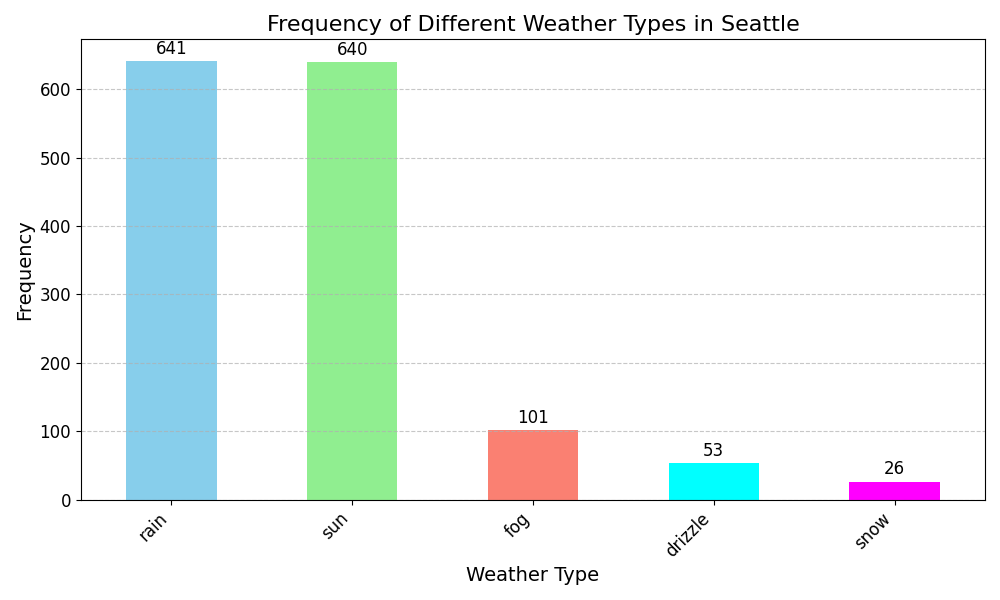

In [ ]:
Image(filename="groupchat/weather_plot_improved.png") #groupchat 디렉토리 내 png파일로 변경할 것. 혹은 프롬프트로 파일명 지정할 것 